In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


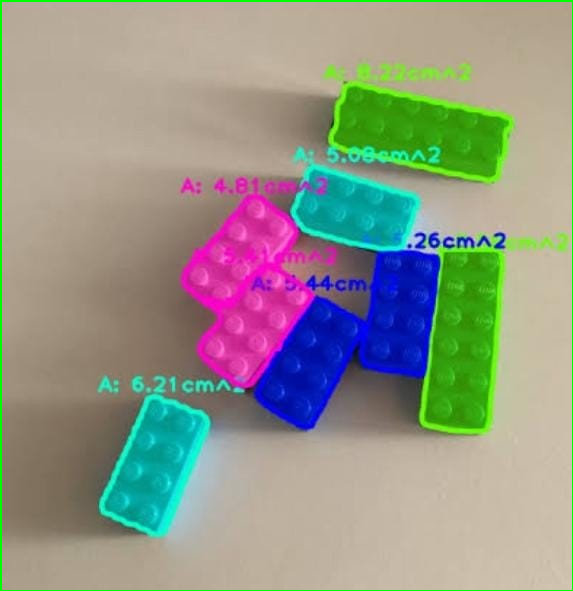

Detected surface areas: [338643]


In [35]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_objects_and_calculate_area(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Could not open or find the image")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize the list to hold areas
    areas = []

    for contour in contours:
        # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Calculate the area (assuming the object is rectangular)
        area = w * h
        areas.append(area)

        # Draw the bounding box and area on the image
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, f"Area: {area} cm^2", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the result using cv2_imshow for Colab
    cv2_imshow(image)

    return areas

# Path to the provided image
image_path = '/content/drive/MyDrive/Colab Notebooks/Image.jpg'

# Detect objects and calculate their surface areas
areas = detect_objects_and_calculate_area(image_path)
print("Detected surface areas:", areas)
